Nama : Nabilah Sofieyanti

Proyek Akhir : Image Classification Model Deployment

Belajar Pengembangan Machine Learning

## Import library

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import zipfile,os

import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import pathlib

## Load data

In [2]:
local_zip = '/content/Intel_image.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

base_dir = '/content/Intel_image/seg'

In [3]:
os.listdir(base_dir)

['buildings', 'sea', 'forest', 'glacier', 'street', 'mountain']

## Split data

In [4]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range=0.2,
                    fill_mode= 'nearest',
                    validation_split=0.2)

val_datagen = ImageDataGenerator(
                    rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
        base_dir,  
        target_size=(150, 150),
        shuffle=True,
        subset='training',
        class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(150, 150),
        subset='validation',
        class_mode='categorical')

Found 13630 images belonging to 6 classes.
Found 3404 images belonging to 6 classes.


## Modelling and compile

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

## Callbacks

In [9]:
#callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85) and (logs.get('val_accuracy')>0.85):
      print("\nAkurasi telah mencapai 85%, stop training!")
      self.model.stop_training = True
callbacks = myCallback()

## Training model

In [10]:
num_epochs = 30
history = model.fit(train_generator, 
                    epochs = num_epochs, 
                    validation_steps = 5,
                    validation_data=validation_generator,
                    verbose=2,
                    callbacks=[callbacks]
                    )

Epoch 1/30
426/426 - 856s - loss: 1.0369 - accuracy: 0.5787 - val_loss: 0.8201 - val_accuracy: 0.6625 - 856s/epoch - 2s/step
Epoch 2/30
426/426 - 853s - loss: 0.7374 - accuracy: 0.7165 - val_loss: 0.7612 - val_accuracy: 0.7312 - 853s/epoch - 2s/step
Epoch 3/30
426/426 - 845s - loss: 0.6235 - accuracy: 0.7701 - val_loss: 0.8066 - val_accuracy: 0.6562 - 845s/epoch - 2s/step
Epoch 4/30
426/426 - 856s - loss: 0.5577 - accuracy: 0.7988 - val_loss: 0.5768 - val_accuracy: 0.8250 - 856s/epoch - 2s/step
Epoch 5/30
426/426 - 849s - loss: 0.5084 - accuracy: 0.8169 - val_loss: 0.5031 - val_accuracy: 0.8188 - 849s/epoch - 2s/step
Epoch 6/30
426/426 - 847s - loss: 0.4832 - accuracy: 0.8260 - val_loss: 0.3627 - val_accuracy: 0.8687 - 847s/epoch - 2s/step
Epoch 7/30
426/426 - 846s - loss: 0.4365 - accuracy: 0.8420 - val_loss: 0.4894 - val_accuracy: 0.8438 - 846s/epoch - 2s/step
Epoch 8/30
426/426 - 848s - loss: 0.4056 - accuracy: 0.8521 - val_loss: 0.4300 - val_accuracy: 0.8250 - 848s/epoch - 2s/step


## Plot

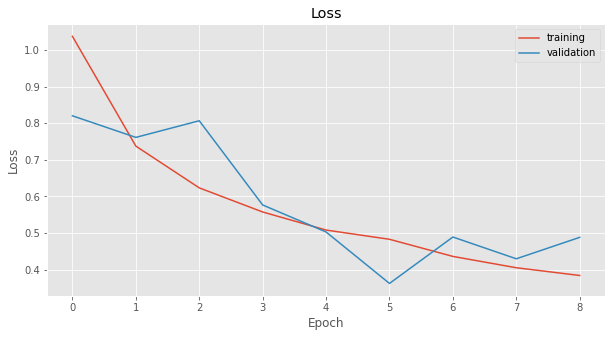

In [11]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="training")
plt.plot(history.history["val_loss"], label="validation")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

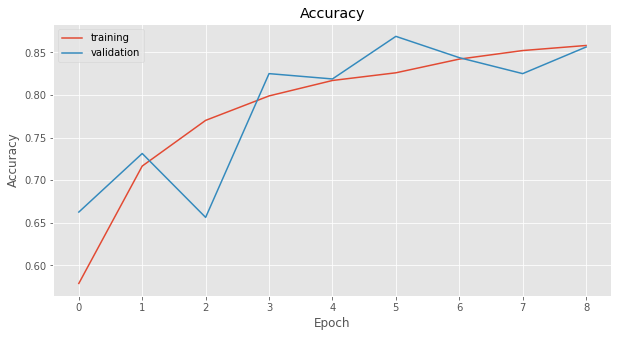

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

## Predict

In [13]:
print(train_generator.class_indices)

{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


Saving 4868.jpg to 4868.jpg
4868.jpg
Street


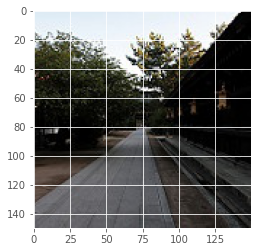

In [15]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  output_class = np.argmax(classes)
  print(fn)
  if output_class==0:
    print('Buildings')
  elif output_class==1:
    print('Forest')
  elif output_class==2:
    print('Glacier')
  elif output_class==3:
    print('Mountain')
  elif output_class==3:
    print('Sea')
  else:
    print('Street')

## Save model

In [16]:
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

In [17]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [20]:
tflite_model_file = pathlib.Path('vegs.tflite')
tflite_model_file.write_bytes(tflite_model)

54133124